In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

Data Processing

In [ ]:
# Load "train" data in pd df

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/24S_ICS435_FPROJECT/data/AIDS_Classification.csv')

#One Hot Encode the categorical variables
#df_encoded = pd.get_dummies(df, columns=['trt', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt'])

#Setting aside 10% of the data
test_df = df.sample(frac=0.1, random_state=435)
train_val_df = df.drop(test_df.index)

#Remaining data: training and validation sets
X_train_val = train_val_df.drop('infected', axis=1)
y_train_val = train_val_df['infected']

X_test = test_df.drop('infected', axis=1)
y_test = test_df['infected']

Defining the model, parameter grid and search space for SVM

In [ ]:
svc = SVC(probability=True)
param_grid = {
    'kernel': ['rbf', 'poly'], #linear took waay too long
    'C': [0.1,1, 10],
}
grid_search = GridSearchCV(svc,
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=3)

In [ ]:
grid_search.fit(X_train_val,y_train_val) #fit model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.918 total time=   0.3s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.883 total time=   0.3s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.925 total time=   0.3s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.912 total time=   0.3s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.824 total time=   0.3s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.912 total time=   0.2s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.863 total time=   0.2s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.914 total time=   0.2s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.899 total time=   0.2s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.798 total time=   0.2s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.922 total time=   0.3s
[CV 2/5] END ...................C=1, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly']},
             scoring='roc_auc', verbose=3)

In [ ]:
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation ROC AUC Score:", grid_search.best_score_)
results = pd.DataFrame(grid_search.cv_results_)

Best hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best ROC AUC Score: 0.9106264332651672


In [ ]:
# proababilities for the positive class
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

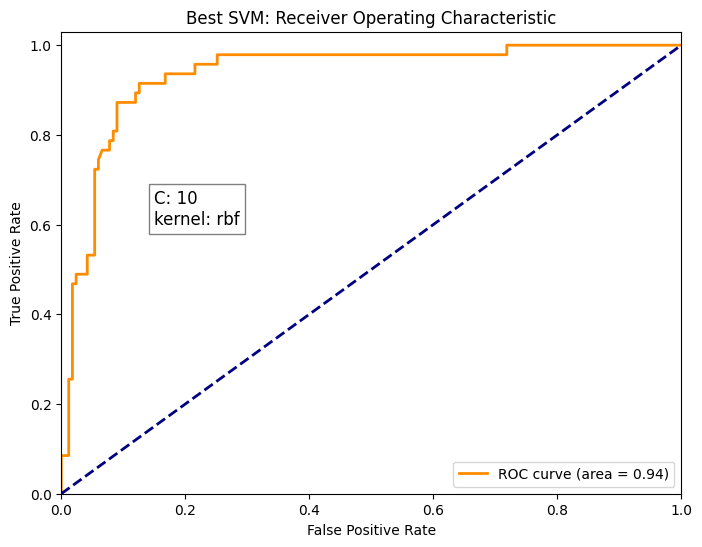

In [ ]:
#plot roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best SVM: Receiver Operating Characteristic')
params_text = "C: 10\nkernel: rbf"
plt.text(0.15, 0.6, params_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.legend(loc="lower right")
plt.show()

In [ ]:
import os

model_directory = './models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

from joblib import dump
# Define the path including the filename for the model
model_path = os.path.join(model_directory, 'SVC_model.joblib')

# Save the model
dump(grid_search.best_estimator_, model_path)

['./models/SVC_model.joblib']